## Observations and Insights

## Dependencies and starter code

In [249]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data=pd.merge(mouse_metadata,study_results,on="Mouse ID")
data.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [201]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_table=data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].agg(["mean","median","var","std","sem"])
stat_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

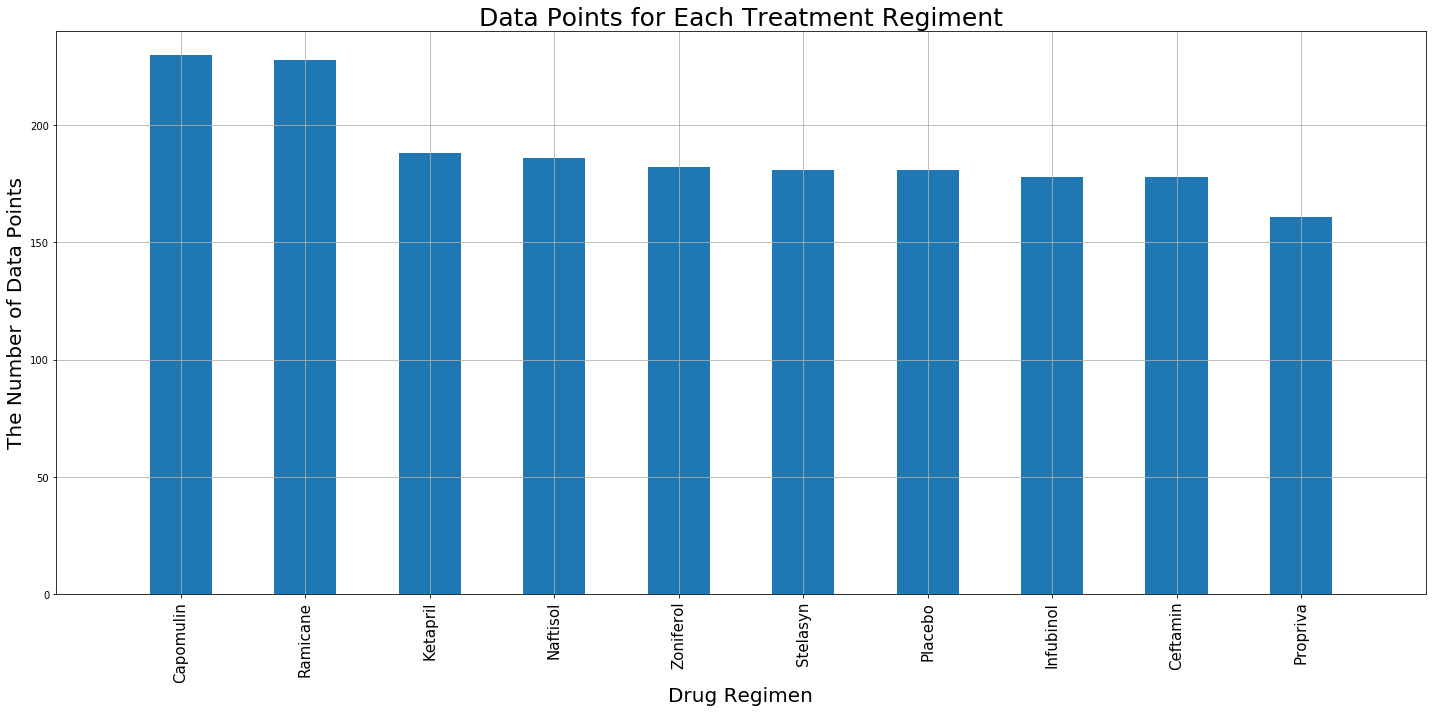

In [202]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points=data.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
pandas_bar=data_points.plot(kind="bar",figsize=(20,10))
plt.title("Data Points for Each Treatment Regiment",fontSize=25)
plt.xticks(fontSize=15)
plt.xlabel("Drug Regimen",fontSize=20)
plt.ylabel("The Number of Data Points",fontSize=20)
plt.xlim(-1,len(data_points))
plt.ylim(0,max(data_points)+10)
plt.grid()
plt.tight_layout()
plt.show()

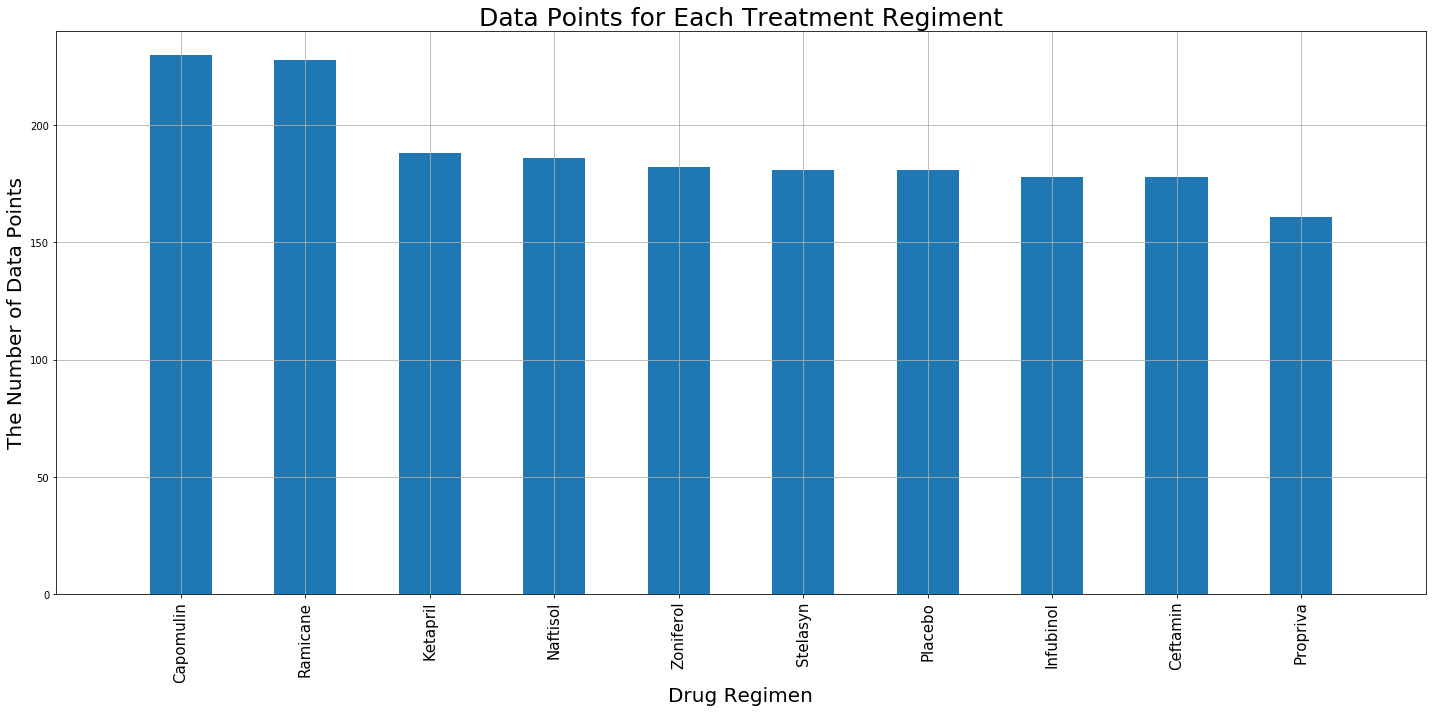

In [203]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis=np.arange(len(data_points))
plt.figure(figsize=(20,10))
plt.bar(x_axis,data_points, width=0.5)
tick_location=[value for value in x_axis]
plt.xticks(tick_location,data_points.keys(),rotation ="vertical")
plt.xticks(fontSize=15)
plt.title("Data Points for Each Treatment Regiment",fontSize=25)
plt.xlim(-1,len(x_axis))
plt.ylim(0,max(data_points)+10)
plt.xlabel("Drug Regimen",fontSize=20)
plt.ylabel("The Number of Data Points",fontSize=20)
plt.grid()
plt.tight_layout()
plt.show()

## Pie plots

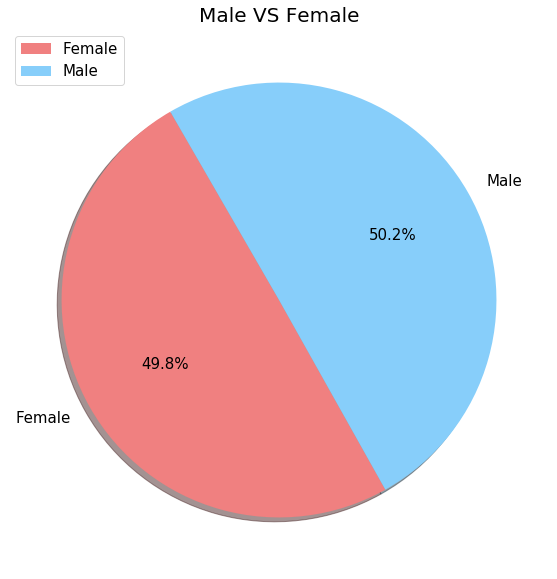

In [204]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex=mouse_metadata.groupby(["Sex"])["Mouse ID"].count()
pandas_pie=sex.plot(kind="pie",figsize=(20,10),autopct="%1.1f%%",shadow=True,startangle=120,fontsize=15,colors=["lightcoral", "lightskyblue"])
pandas_pie.set_ylabel('')
plt.title("Male VS Female", fontsize=20)
plt.legend(["Female","Male"],fontsize=15)
plt.show()


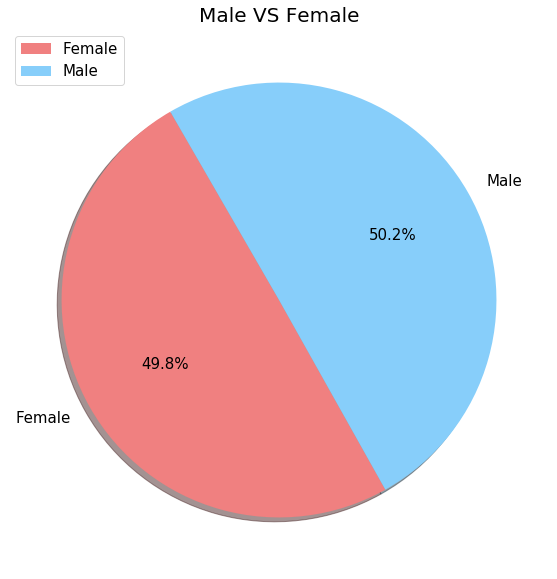

In [205]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot()
ax.pie(sex,labels=sex.index,autopct="%1.1f%%",shadow=True,startangle=120,colors=["lightcoral", "lightskyblue"],textprops={'fontsize': 15})
ax.set_title("Male VS Female", fontsize=20)
ax.legend(["Female","Male"],fontsize=15)
plt.show()

## Quartiles, outliers and boxplots

In [206]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
df=data.loc[data["Drug Regimen"].isin(["Capomulin","Ramicane", "Infubinol","Ceftamin"]),["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
final_tumor=df.groupby(["Drug Regimen","Mouse ID"],as_index=False).agg({"Timepoint":"max"})
final_df=df.merge(final_tumor, on=("Drug Regimen","Mouse ID","Timepoint"))

#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Calculate for Capomulin
cap=final_df[final_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
print("Values for the Capomulin Tumor Volume (mm3):")
print(cap)

qur_cap=cap.quantile([.25,.5,.75])                                                               
lowerqcap=qur_cap[0.25]
upperqcap=qur_cap[0.75]
iqr_cap=upperqcap-lowerqcap
lower_bound = lowerqcap - (1.5*iqr_cap)
upper_bound = upperqcap + (1.5*iqr_cap)

print(f"The lower quartile of Capomulin is: {lowerqcap}")
print(f"The upper quartile of Capomulin is: {upperqcap}")
print(f"The interquartile range of Capomulin is: {iqr_cap}")
print(f"The the median of Capomulin is: {qur_cap[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_capomulin=cap.where((cap < lower_bound) | (cap > upper_bound))
print("All potential outliers of Capomulin:")
outlier_capomulin


Values for the Capomulin Tumor Volume (mm3):
1     23.343598
2     28.484033
3     28.430964
6     30.485985
10    31.023923
12    31.896238
13    32.377357
14    33.329098
16    34.455298
20    37.311846
22    36.041047
24    37.074024
28    38.846876
30    38.939633
31    38.982878
32    38.753265
34    38.125164
35    39.952347
36    40.658124
37    40.159220
38    40.728578
39    41.483008
40    41.581521
45    47.685963
82    46.539206
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
All potential outliers of Capomulin:


1    NaN
2    NaN
3    NaN
6    NaN
10   NaN
12   NaN
13   NaN
14   NaN
16   NaN
20   NaN
22   NaN
24   NaN
28   NaN
30   NaN
31   NaN
32   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
40   NaN
45   NaN
82   NaN
Name: Tumor Volume (mm3), dtype: float64

In [207]:
#Calculate for Ramicane
ram=final_df[final_df["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
print("Values for the Ramicane Tumor Volume (mm3):")
print(ram)

qur_ram=ram.quantile([.25,.5,.75])                                                               
lowerqram=qur_ram[0.25]
upperqram=qur_ram[0.75]
iqr_ram=upperqram-lowerqram
lower_bound = lowerqram - (1.5*iqr_ram)
upper_bound = upperqram + (1.5*iqr_ram)

print(f"The lower quartile of Ramicane is: {lowerqram}")
print(f"The upper quartile of Ramicane is: {upperqram}")
print(f"The interquartile range of Ramicane is: {iqr_ram}")
print(f"The the median of Ramicane is: {qur_ram[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_ramicane=ram.where((ram < lower_bound) | (ram > upper_bound))
print("All potential outliers of Ramicane:")
outlier_ramicane

Values for the Ramicane Tumor Volume (mm3):
0     22.050126
4     29.128472
5     30.276232
7     30.564625
8     30.638696
9     31.560470
11    31.095335
15    33.397653
17    32.978522
18    33.562402
19    36.134852
21    38.810366
23    37.225650
25    36.374510
26    36.561652
27    37.311236
29    38.342008
33    38.407618
41    40.659006
42    40.667713
43    45.220869
44    43.047543
46    43.419381
47    43.166373
48    44.183451
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
All potential outliers of Ramicane:


0    NaN
4    NaN
5    NaN
7    NaN
8    NaN
9    NaN
11   NaN
15   NaN
17   NaN
18   NaN
19   NaN
21   NaN
23   NaN
25   NaN
26   NaN
27   NaN
29   NaN
33   NaN
41   NaN
42   NaN
43   NaN
44   NaN
46   NaN
47   NaN
48   NaN
Name: Tumor Volume (mm3), dtype: float64

In [208]:
#Calculate for Infubinol
inf=final_df[final_df["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
print("Values for the Infubinol Tumor Volume (mm3):")
print(inf)

qur_inf=inf.quantile([.25,.5,.75])                                                               
lowerqinf=qur_inf[0.25]
upperqinf=qur_inf[0.75]
iqr_inf=upperqinf-lowerqinf
lower_bound = lowerqinf - (1.5*iqr_inf)
upper_bound = upperqinf + (1.5*iqr_inf)

print(f"The lower quartile of Infubinol is: {lowerqinf}")
print(f"The upper quartile of Infubinol is: {upperqinf}")
print(f"The interquartile range of Infubinol is: {iqr_inf}")
print(f"The the median of Infubinol is: {qur_inf[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_infubinol=inf.where((inf < lower_bound) | (inf > upper_bound))
print("All potential outliers of Infubinol:")
outlier_infubinol


Values for the Infubinol Tumor Volume (mm3):
49    67.973419
50    65.525743
52    57.031862
53    66.083066
57    72.226731
58    36.321346
59    60.969711
60    62.435404
61    60.918767
64    67.289621
67    66.196912
68    62.117279
74    47.010364
75    60.165180
77    55.629428
78    45.699331
80    54.656549
83    55.650681
87    46.250112
88    54.048608
89    51.542431
91    50.005138
92    58.268442
96    67.685569
99    62.754451
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
All potential outliers of Infubinol:


49          NaN
50          NaN
52          NaN
53          NaN
57          NaN
58    36.321346
59          NaN
60          NaN
61          NaN
64          NaN
67          NaN
68          NaN
74          NaN
75          NaN
77          NaN
78          NaN
80          NaN
83          NaN
87          NaN
88          NaN
89          NaN
91          NaN
92          NaN
96          NaN
99          NaN
Name: Tumor Volume (mm3), dtype: float64

In [209]:
#Calculate for Ceftamin
cef=final_df[final_df["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]
print("Values for the Ceftamin Tumor Volume (mm3):")
print(cef)

qur_cef=cef.quantile([.25,.5,.75])                                                               
lowerqcef=qur_cef[0.25]
upperqcef=qur_cef[0.75]
iqr_cef=upperqcef-lowerqcef
lower_bound = lowerqcef - (1.5*iqr_cef)
upper_bound = upperqcef + (1.5*iqr_cef)

print(f"The lower quartile of Ceftamin is: {lowerqcef}")
print(f"The upper quartile of Ceftamin is: {upperqcef}")
print(f"The interquartile range of Ceftamin is: {iqr_cef}")
print(f"The the median of Ceftamin is: {qur_cef[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_ceftamin=cef.where((cef < lower_bound) | (cef > upper_bound))
print("All potential outliers of Ceftamin:")
outlier_ceftamin

Values for the Ceftamin Tumor Volume (mm3):
51    62.999356
54    45.000000
55    56.057749
56    55.742829
62    48.722078
63    47.784682
65    61.849023
66    68.923185
69    67.748662
70    57.918381
71    46.784535
72    59.851956
73    64.299830
76    59.741901
79    61.433892
81    64.192341
84    45.000000
85    52.925348
86    45.000000
90    67.527482
93    45.000000
94    64.634949
95    61.386660
97    68.594745
98    64.729837
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
All potential outliers of Ceftamin:


51   NaN
54   NaN
55   NaN
56   NaN
62   NaN
63   NaN
65   NaN
66   NaN
69   NaN
70   NaN
71   NaN
72   NaN
73   NaN
76   NaN
79   NaN
81   NaN
84   NaN
85   NaN
86   NaN
90   NaN
93   NaN
94   NaN
95   NaN
97   NaN
98   NaN
Name: Tumor Volume (mm3), dtype: float64

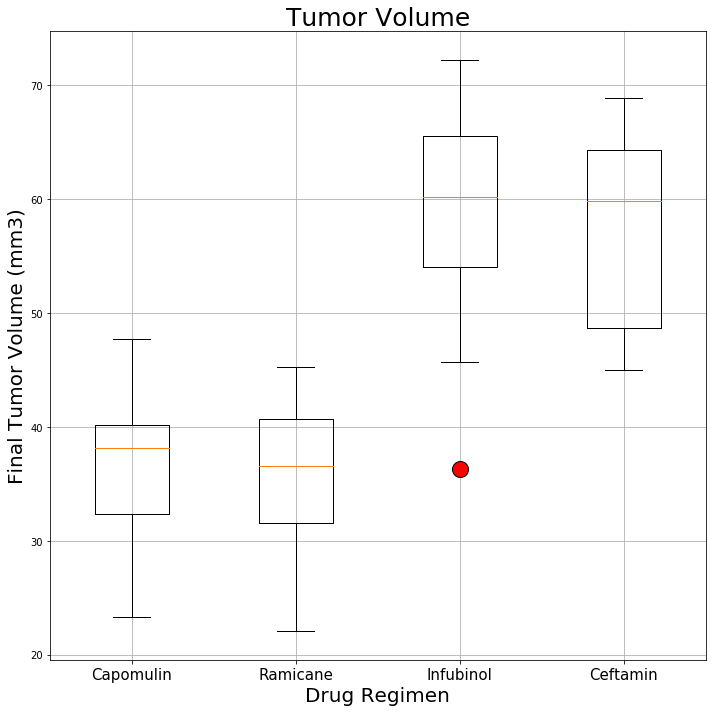

In [210]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot=[cap,ram,inf,cef]
flierprops = dict(marker='o', markerfacecolor='red', markersize=16)
fig1, ax1 = plt.subplots()
ax1.boxplot(box_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops=flierprops)
fig1.set_figheight(10)
fig1.set_figwidth(10)
ax1.set_title('Tumor Volume',fontSize=25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontSize=20)
ax1.set_xlabel('Drug Regimen',fontSize=20)
plt.xticks(fontSize=15)
plt.grid()
plt.tight_layout()
plt.show()

## Line and scatter plots

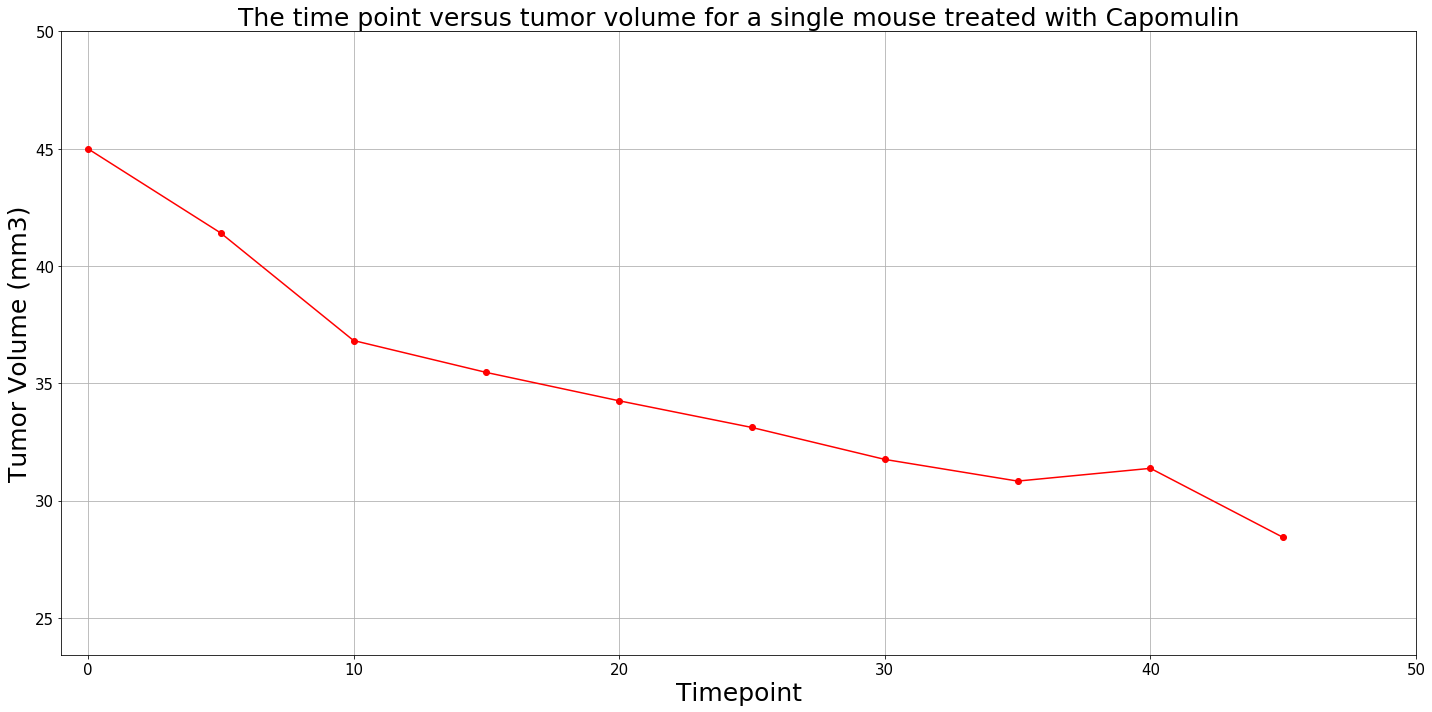

In [211]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
single_mouse=data[(data["Mouse ID"]=="m601") & (data["Drug Regimen"]=="Capomulin")]
x_axis=single_mouse["Timepoint"]
y_axis=single_mouse["Tumor Volume (mm3)"]
plt.figure(figsize=(20,10))
plt.plot(x_axis,y_axis,marker="o", color="red")
plt.title("The time point versus tumor volume for a single mouse treated with Capomulin",fontSize=25)
plt.xlabel("Timepoint",fontSize=25)
plt.ylabel("Tumor Volume (mm3)",fontSize=25)
plt.xticks(fontSize=15)
plt.yticks(fontSize=15)
plt.xlim(-1,max(single_mouse["Timepoint"])+5)
plt.ylim(min(single_mouse["Tumor Volume (mm3)"])-5,max(single_mouse["Tumor Volume (mm3)"])+5)
plt.grid()
plt.tight_layout()
plt.show()

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

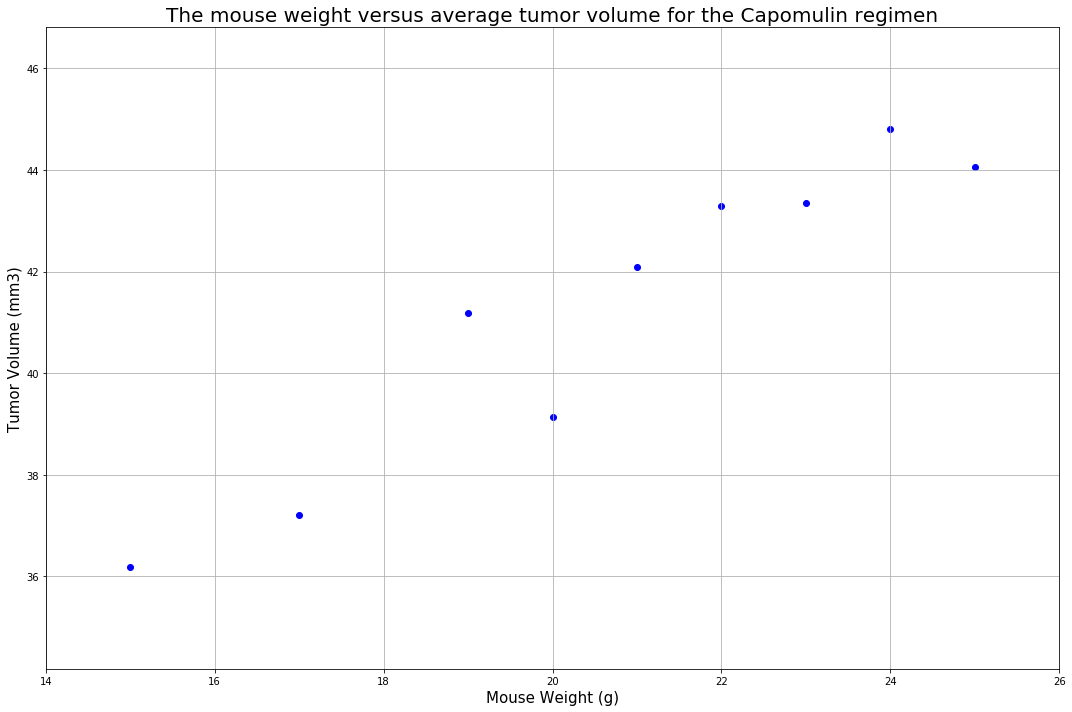

In [234]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumor_weight=data[data["Drug Regimen"]=="Capomulin"]
aver_weight=tumor_weight.groupby("Weight (g)",as_index=False)["Tumor Volume (mm3)"].mean()

x_axis=aver_weight["Weight (g)"]
y_axis=aver_weight["Tumor Volume (mm3)"]
plt.figure(figsize=(15,10))
plt.scatter(x_axis,y_axis,marker="o", color="blue")
plt.xlabel('Mouse Weight (g)',fontSize=15)
plt.ylabel('Tumor Volume (mm3)',fontSize=15)
plt.title("The mouse weight versus average tumor volume for the Capomulin regimen",fontSize=20)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(aver_weight["Weight (g)"])-1,max(aver_weight["Weight (g)"])+1)
plt.ylim(min(aver_weight["Tumor Volume (mm3)"])-2,max(aver_weight["Tumor Volume (mm3)"])+2)
plt.grid()
plt.tight_layout()
plt.show()

The correlation coefficient between Mouse weight and Average tumor volume is 0.95


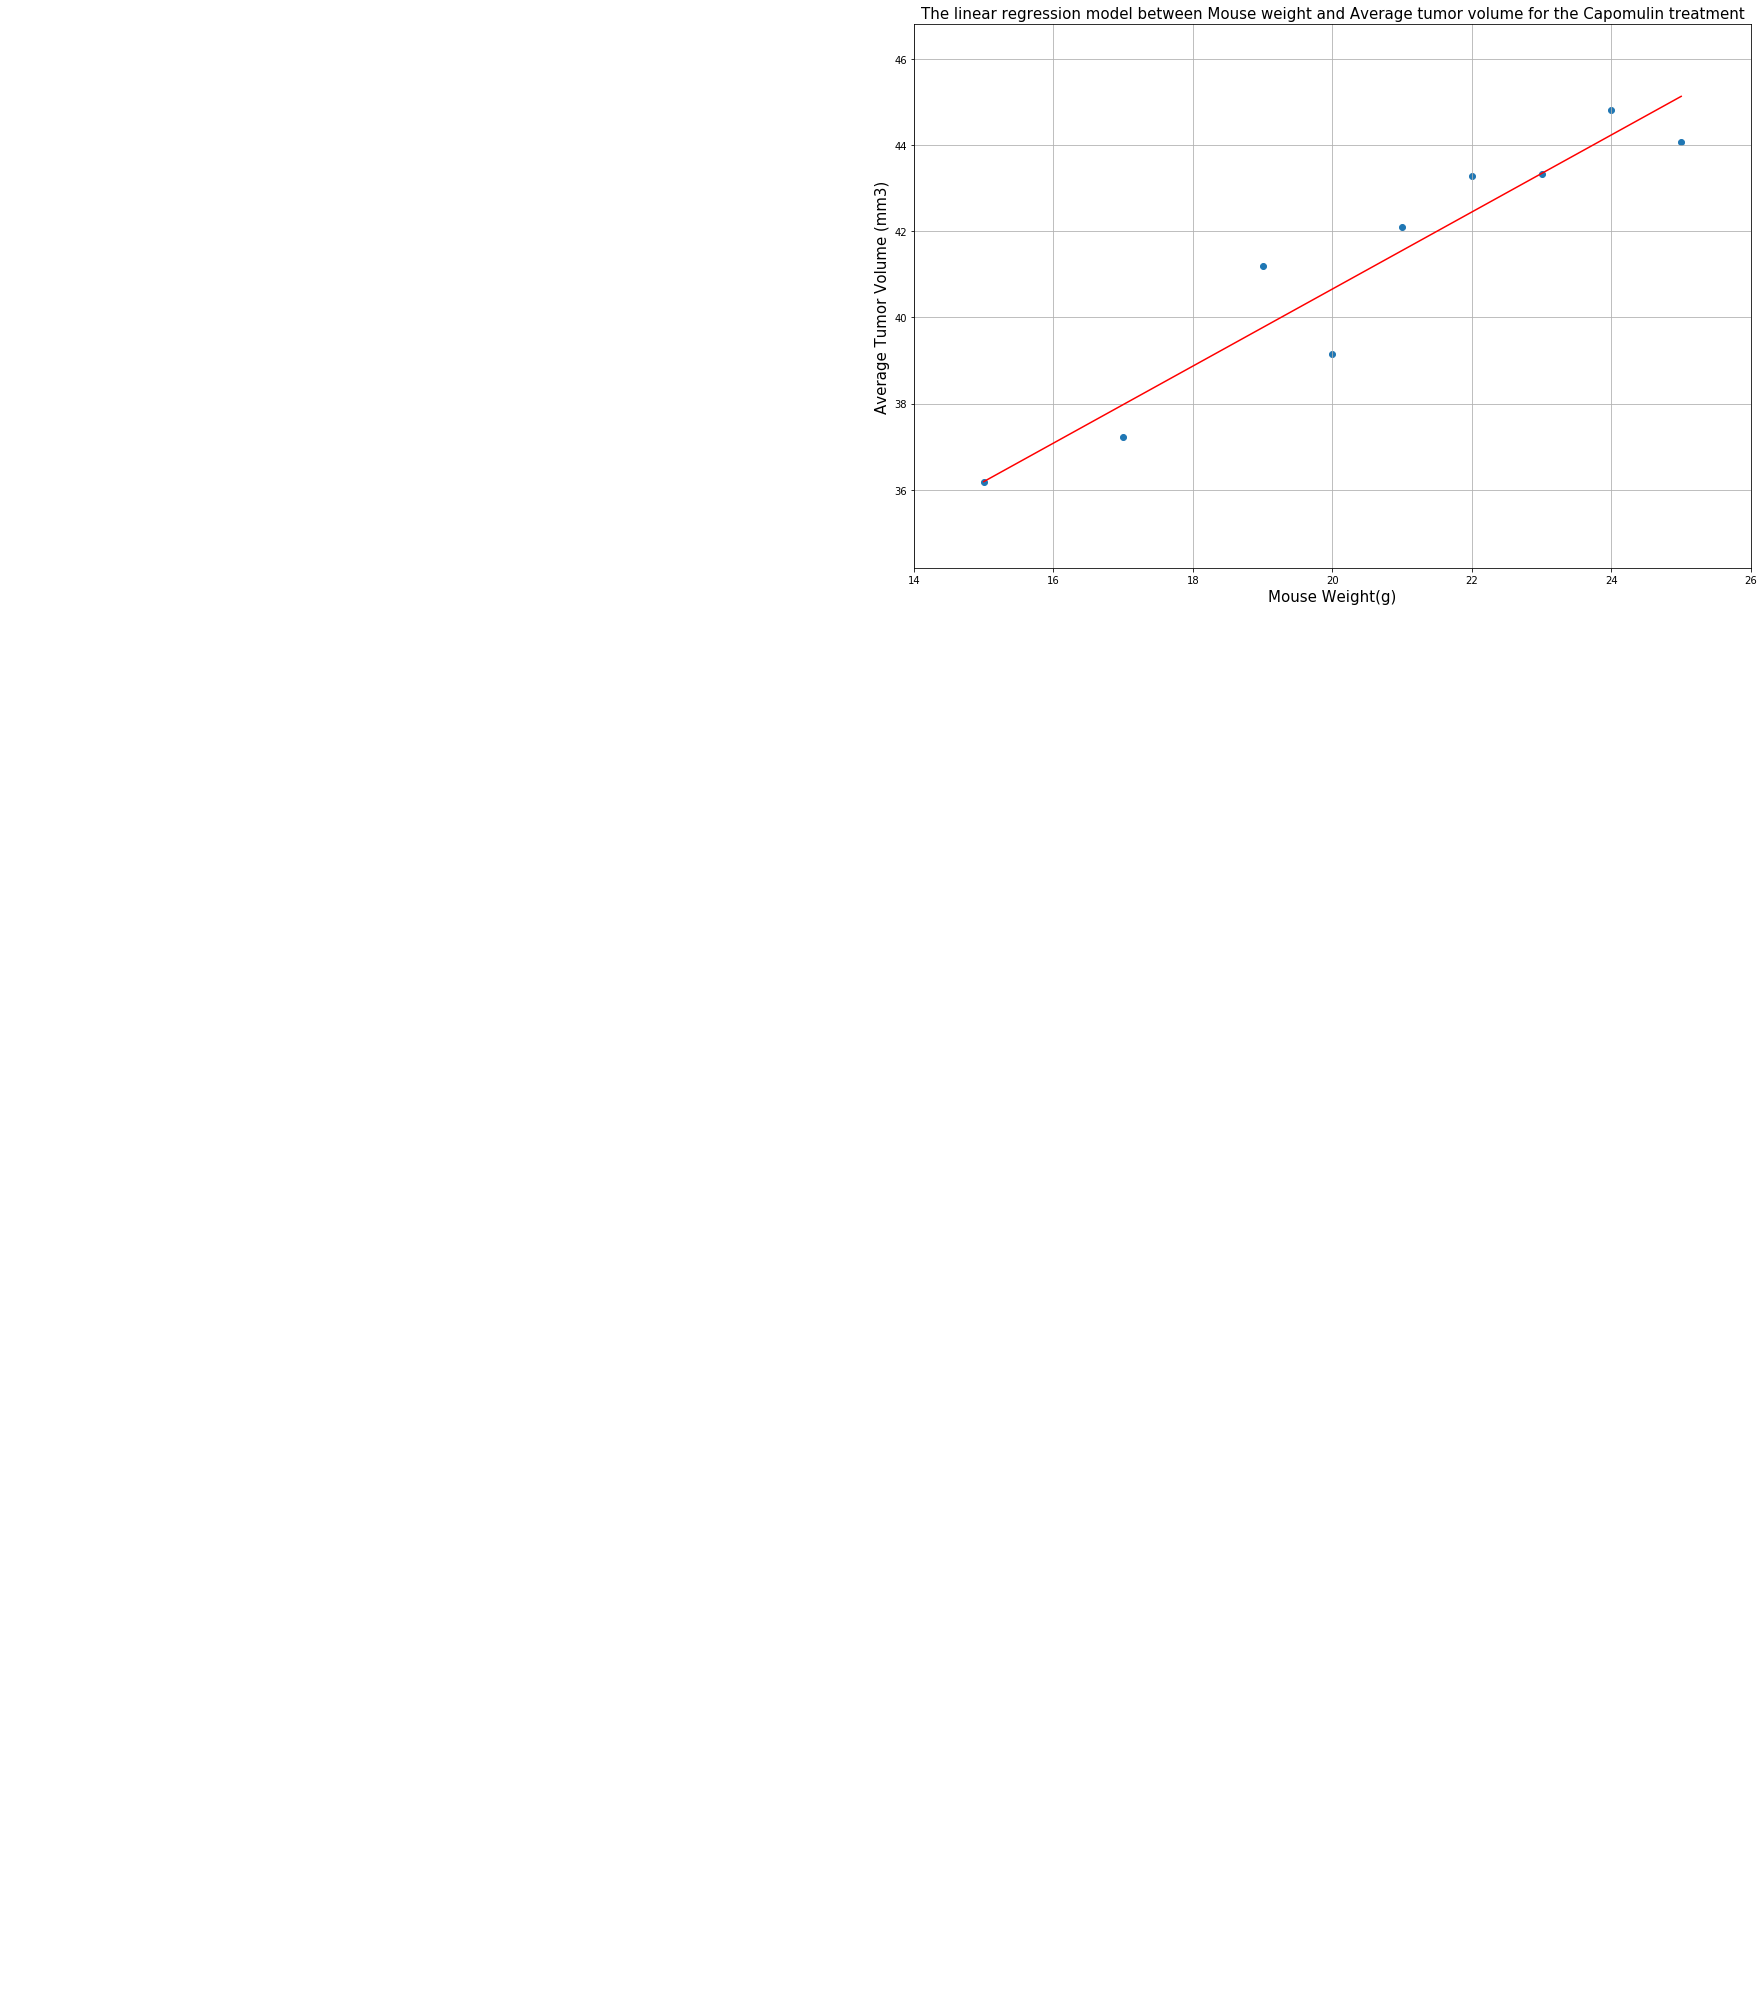

In [257]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_axis=aver_weight["Weight (g)"]
y_axis=aver_weight["Tumor Volume (mm3)"]

print(f"The correlation coefficient between Mouse weight and Average tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
#plt.annotate(line_eq,(1,1),fontsize=15,color="red")


plt.xlabel('Mouse Weight(g)',fontSize=15)
plt.ylabel('Average Tumor Volume (mm3)',fontSize=15)
plt.title("The linear regression model between Mouse weight and Average tumor volume for the Capomulin treatment",fontSize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlim(min(aver_weight["Weight (g)"])-1,max(aver_weight["Weight (g)"])+1)
plt.ylim(min(aver_weight["Tumor Volume (mm3)"])-2,max(aver_weight["Tumor Volume (mm3)"])+2)
plt.grid()
plt.show()